### Basic Harware components and speed 

Hardware Components
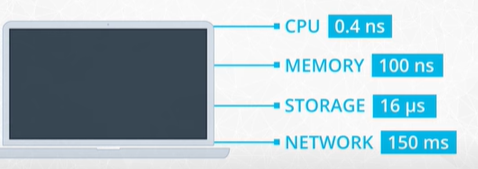

Twitter one second tweets and memory for the tweets in onee second.<br>
our 2.5 GHz computer can do this 1.2million bytes second in 0.01% time

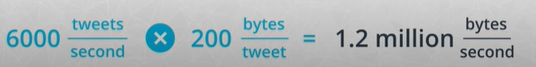

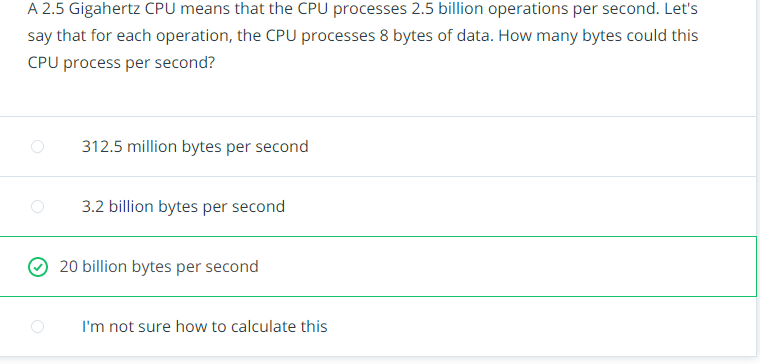

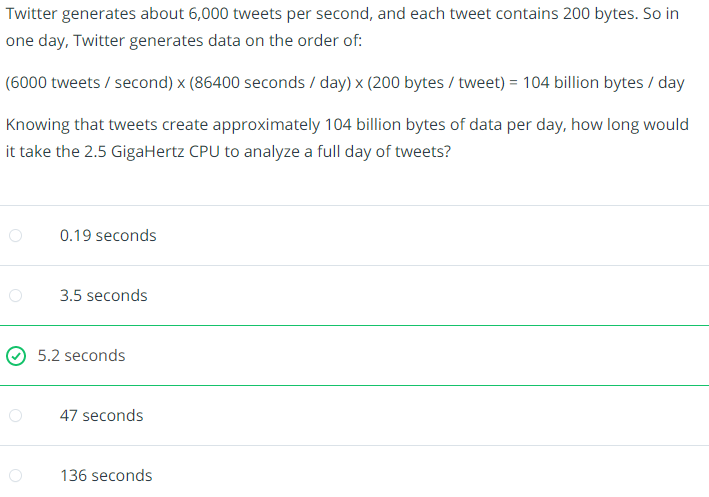

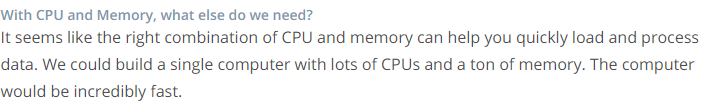

But there are tradeoff for this combination

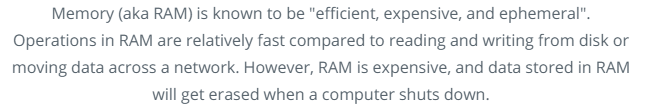

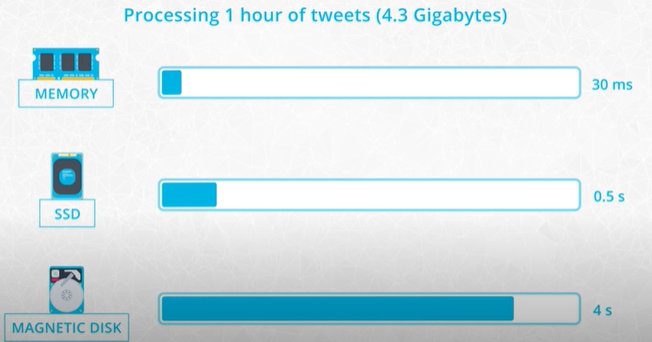

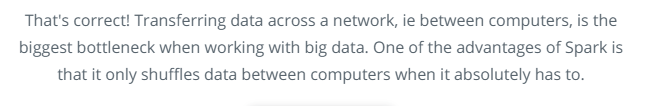

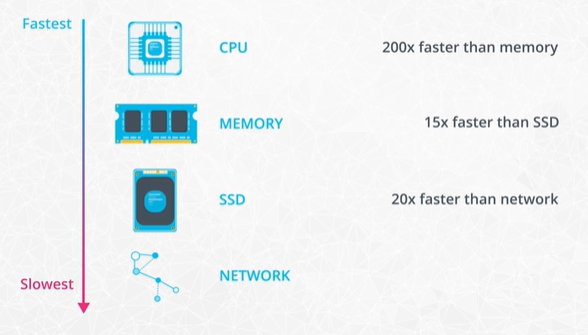

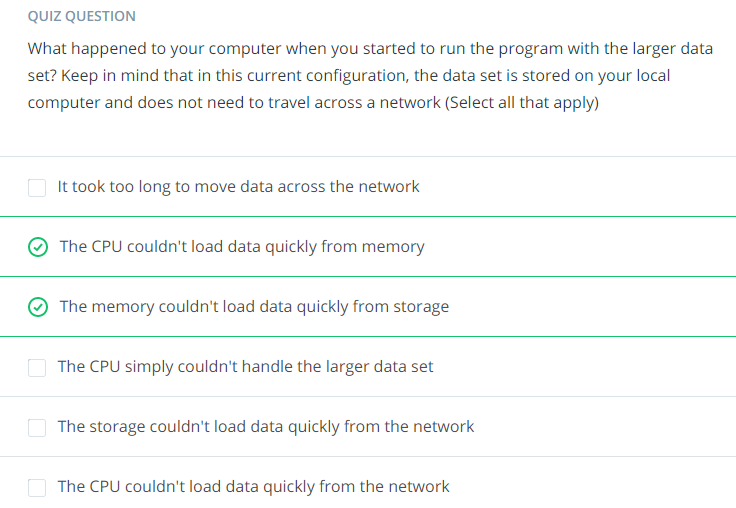

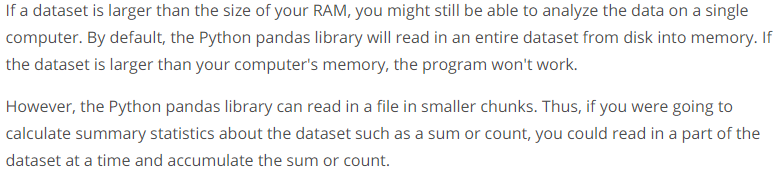

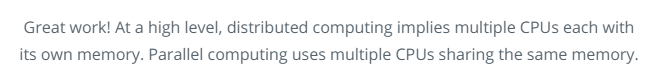

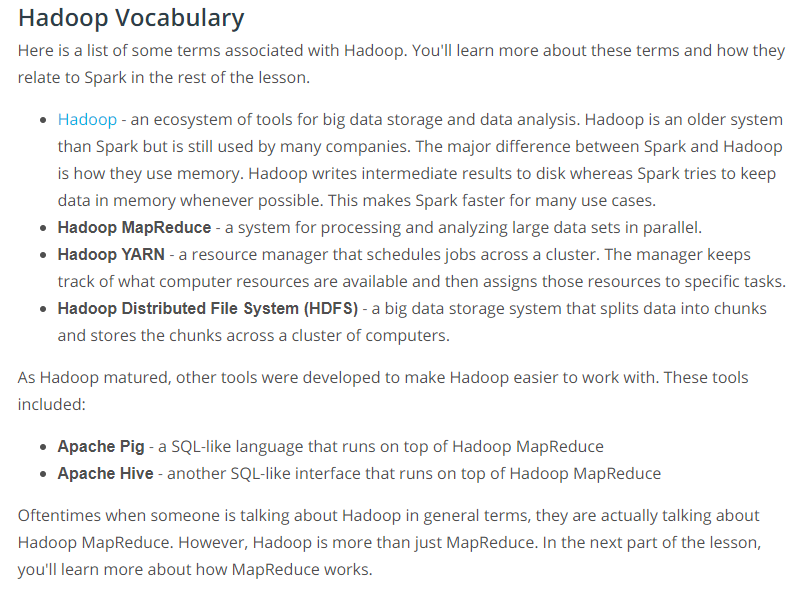

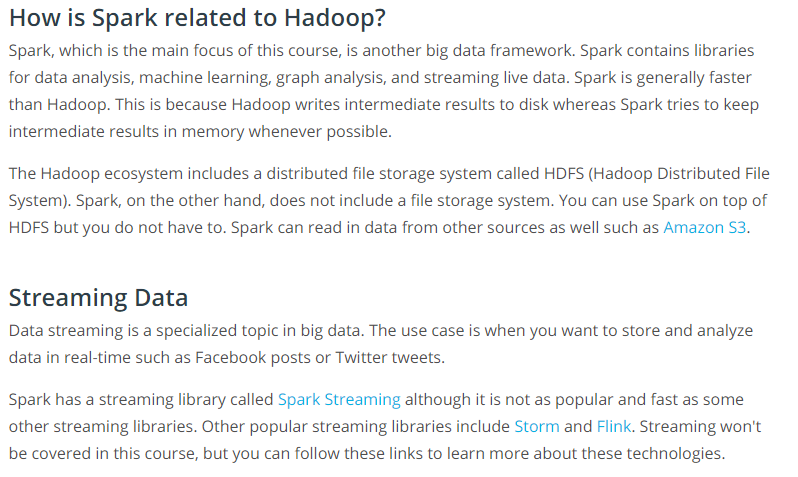

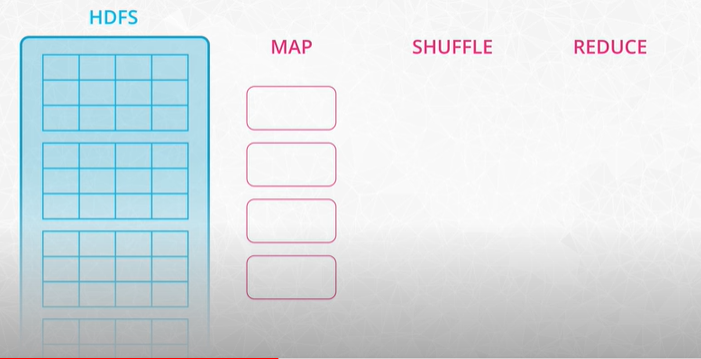

The data is transfered to the four blocks depending upon their capabilities which is handled by HDFS, the data is transisted and results will be written onto a file in each block, this transisition has five steps which are reading,checking and storing them in (key,value) pair. 

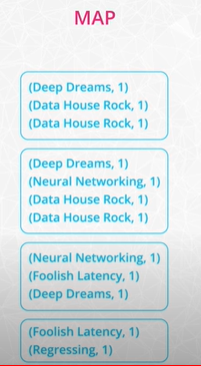

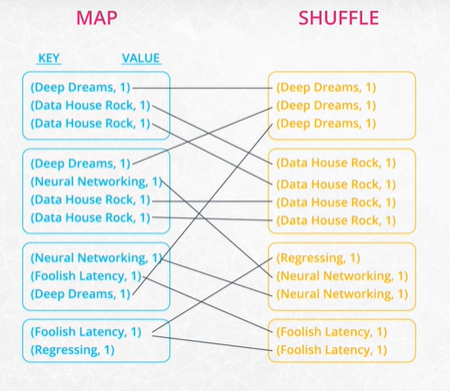

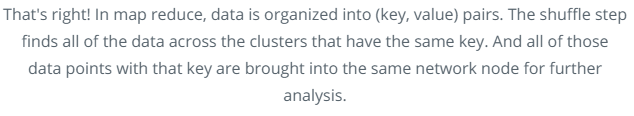

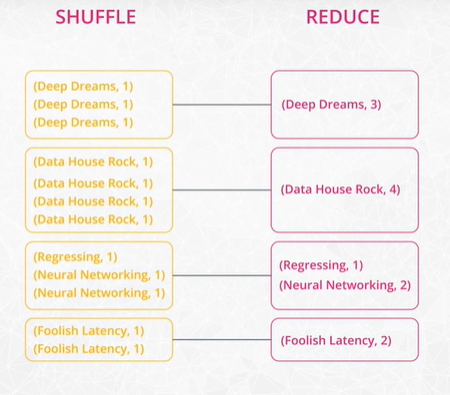

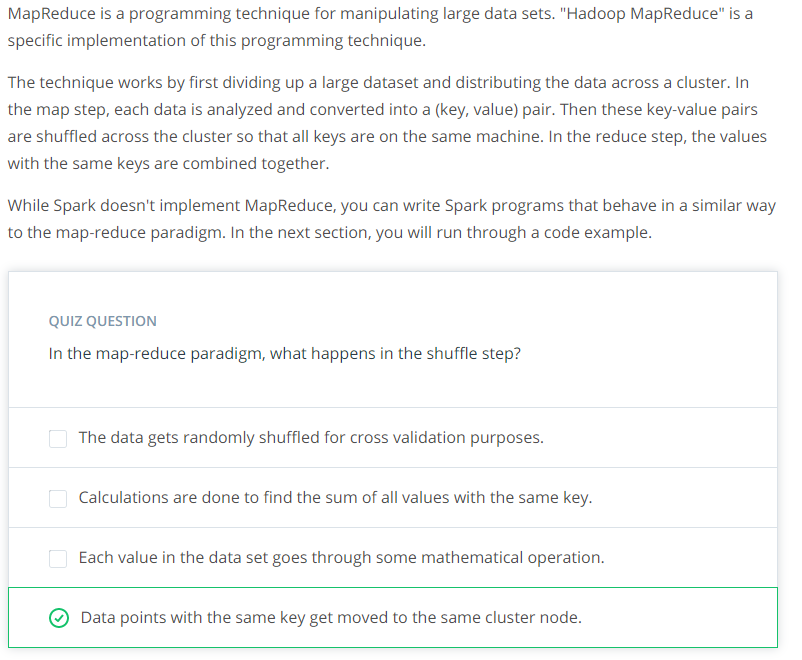

Refer to python notebook to understand the mapreduce steps 

distributed computing means big computational job executed across cluster of nodes Each node is responsible for a set of operations on a subset of the data. At the end, we combine these partial results to get the final answer.

there are 4 modes of spark setup
- single node
- and other three involve cluster manager<br>
--> Sparks on Standalone Customer Manager,<br>
--> YARN from the Hadoop project,<br>
--> and then other open source manager from UC Berkeley's AMPLab Coordinators.

The other three modes are distributed and declare a cluster manager.The cluster manager is a separate process that monitors the available resources,and makes sure that all machines are responsive during the job.


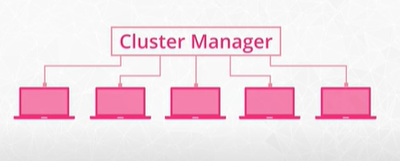

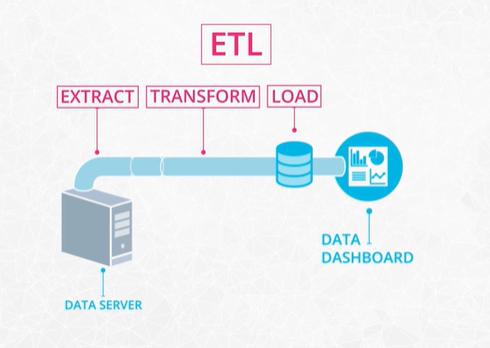

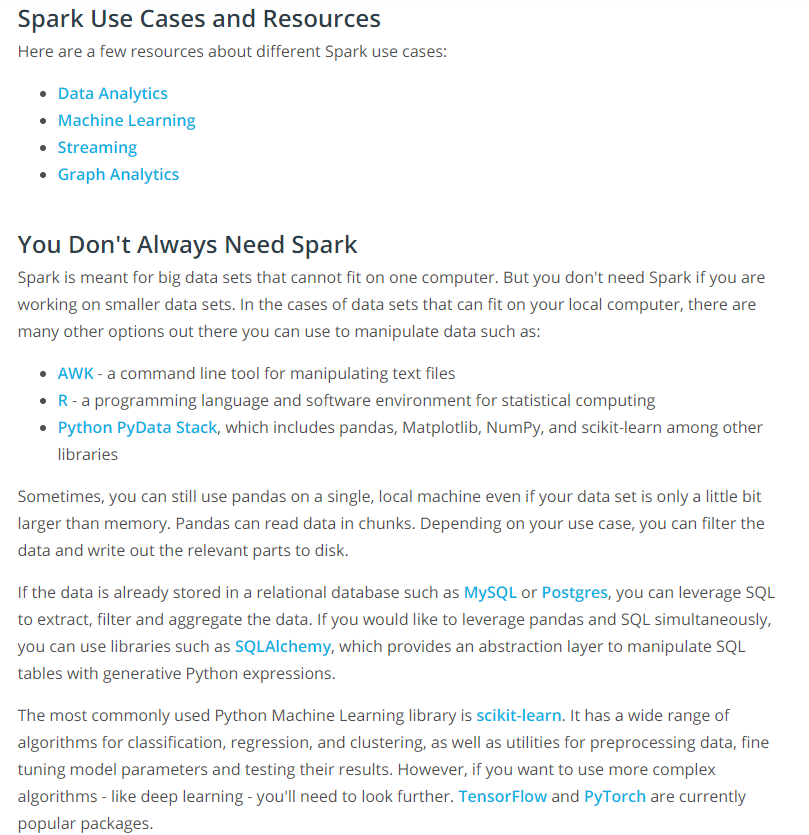

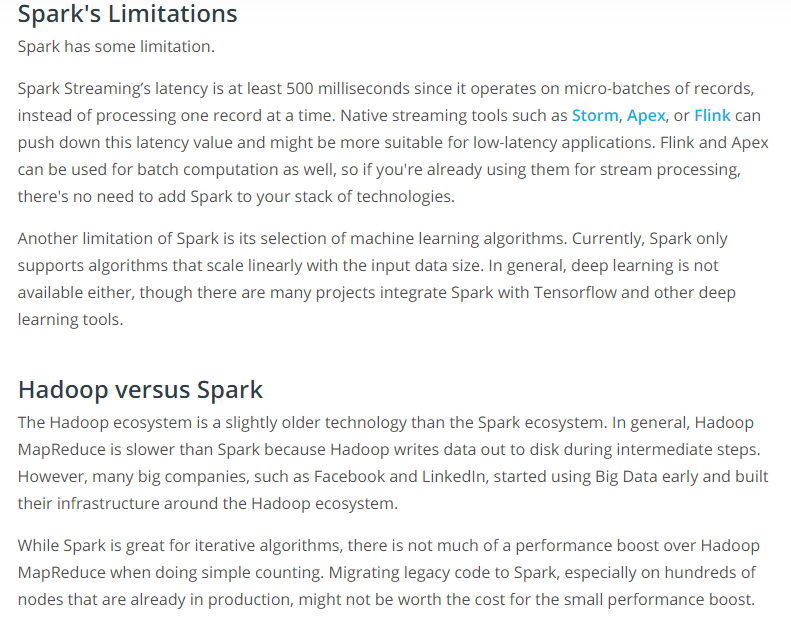

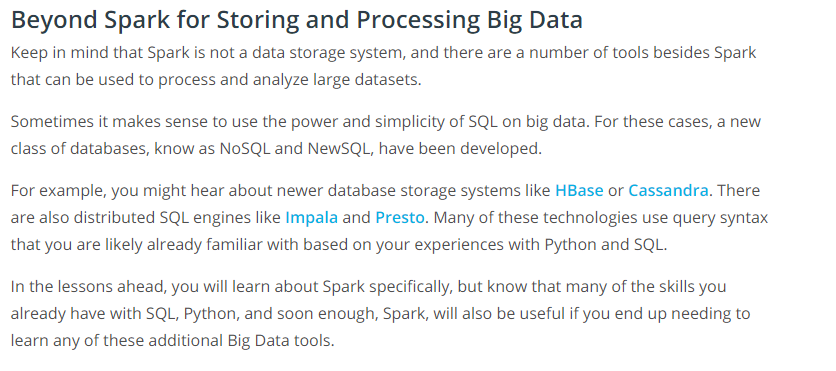

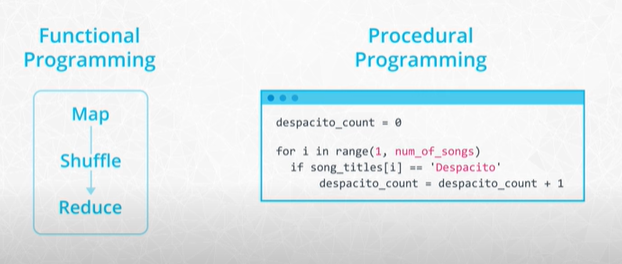

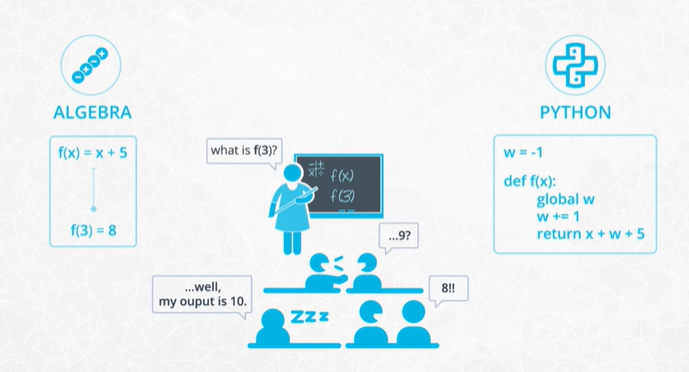

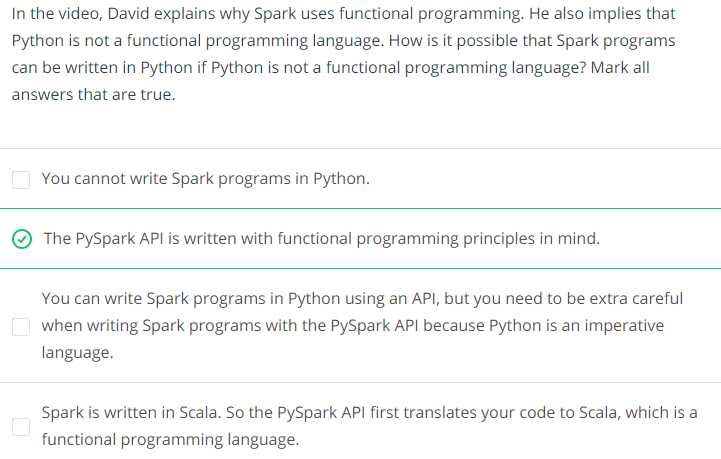

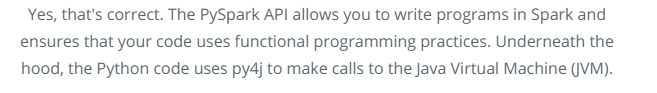

## SparkSession

The first component of each Spark Program is the SparkContext.The SparkContext is the main entry point for Spark functionality and connects the cluster with the application.

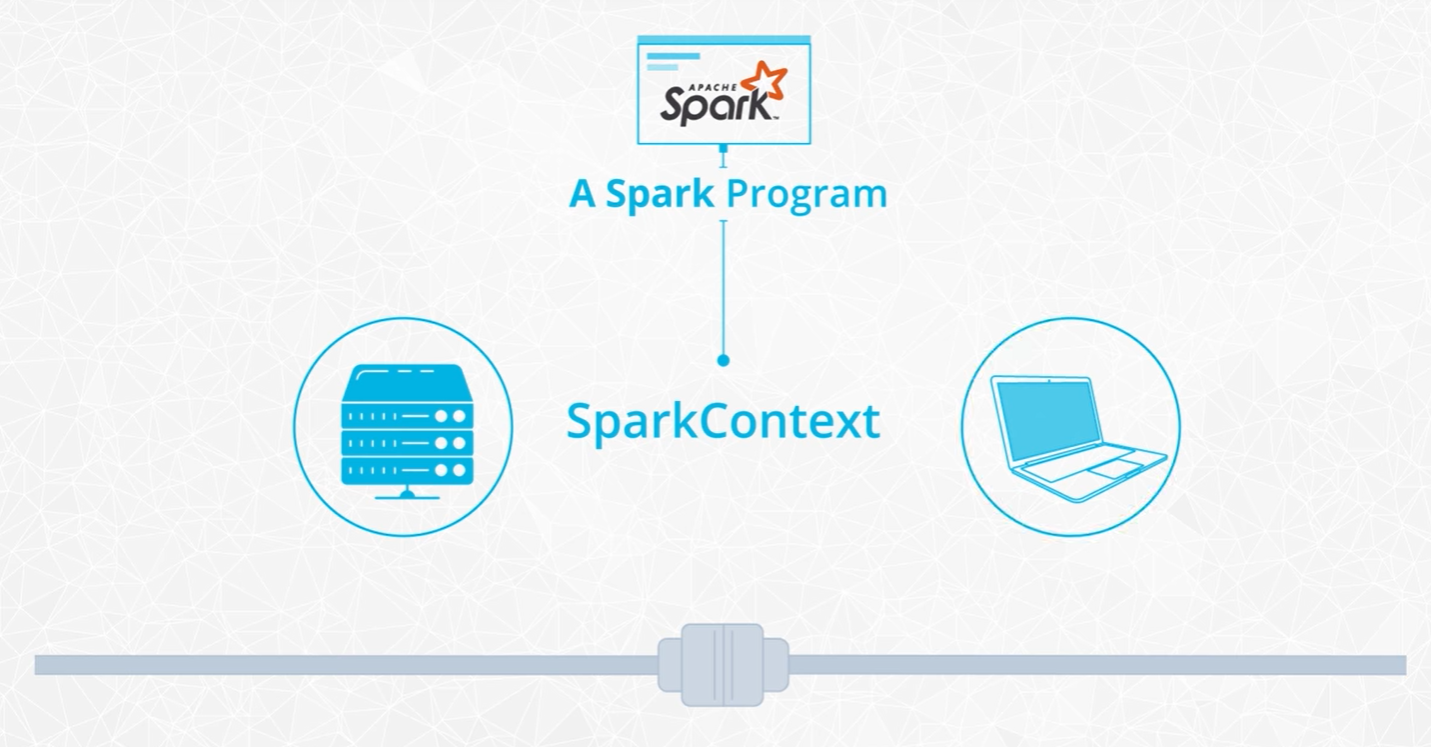

If we would like to use lower level abstractions,we will create objects with SparkContext. To create a SparkContext, we first need a SparkConf object to specify some information aboutnthe application such as its name and the master's nodes IP address.

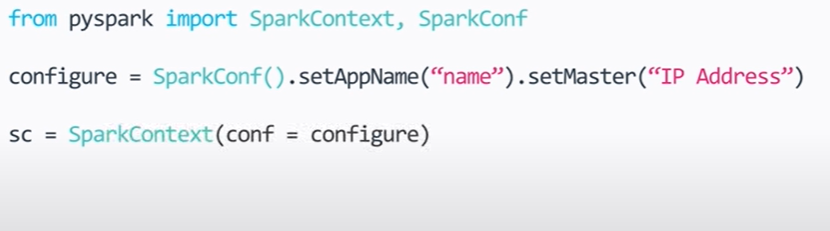

If we run Spark in local mode, we can just put the string 'local' as master.

To read data frames, we need to use SparkContext, Spark Sql equivalent, the "SparkSession". Similarity to the SparkConf,
we can specify some parameters to create a SparkSession. 

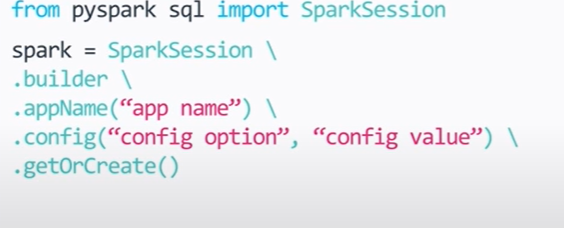

GetOrCreate() means that if you already have a SparkSession running, instead of creating a new one, the old one will be returned and its parameters will be modified to the new configurations.

## Reading and Writing the data with Spark

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName("Our Exercise").getOrCreate()

In [4]:
path = r"C:\Users\ranad\Desktop\Sche\BigData\Spark\sparkify_log_small.json"
user_log = spark.read.json(path)

In [6]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [7]:
spark.sparkContext.getConf().getAll()

[('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.app.id', 'local-1595383477049'),
 ('spark.driver.port', '58051'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host', 'AlienRadr'),
 ('spark.app.name', 'Our Exercise')]

In [9]:
#To display the records
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [14]:
#5 Records
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [25]:
out_path=r"C:\Users\ranad\Desktop\Sche\BigData\Spark\Data\userlog.csv"
user_log.write.save(out_path,format="csv",header=True)

In [26]:
user_log2=spark.read.csv(out_path,header=True)

In [27]:
user_log2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [28]:
user_log2.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession='112', lastName='Matthews', length='232.93342', level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration='1509380319284', sessionId='5132', song='Christmas Tears Will Fall', status='200', ts='1513720872284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')]

In [29]:
user_log2.select("userID").show()

+------+
|userID|
+------+
|  1046|
|  1000|
|  2219|
|  2373|
|  1747|
|  1747|
|  1162|
|  1061|
|   748|
|   597|
|  1806|
|   748|
|  1176|
|  2164|
|  2146|
|  2219|
|  1176|
|  2904|
|   597|
|   226|
+------+
only showing top 20 rows



## Imperative vs Declarative programming